In [108]:
import pandas as pd
import numpy as np
import copy
import plotly.express as px
import plotly.graph_objects as go
from plotly import __version__
import sys
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [109]:
df_2019 = pd.read_csv('dataset/developer_survey_2019/survey_results_public.csv', index_col='Respondent')
df_2020 = pd.read_csv('dataset/developer_survey_2020/survey_results_public.csv', index_col='Respondent')
lang_list = ['Python', 'JavaScript', 'Java', 'HTML/CSS', 'C++', 'C', 'C#', 'Go','Bash/Shell/PowerShell', 'SQL', 'TypeScript', 'R', 'PHP', 'Ruby', 'Assembly', 'Rust','VBA', 'WebAssembly', 'Other(s):' ,'Swift', 'Kotlin', 'Erlang', 'Elixir', 'Clojure','Objective-C','Scala','F#','Dart', 'Perl', 'Julia','Haskell']
entries_in_2019 = len(df_2019)
entries_in_2020 = len(df_2020)
print(entries_in_2019, entries_in_2020)


88883 64461


In [110]:
def calculate_percentage_of_languages(df, total_entries, langs):
    language_percentages = {}
    for language in langs:
        filt = df['LanguageWorkedWith'].str.contains(language , na=False)
        no_of_devs_who_knows_the_language = len(df.loc[filt, 'LanguageWorkedWith'])
        language_percentages[language] = no_of_devs_who_knows_the_language/total_entries*100
    return language_percentages

In [111]:

interested_languages = ['Python', 'JavaScript', 'Java', 'Go', 'R', 'Swift','C#']
language_percentage_2019 = calculate_percentage_of_languages(df_2019, entries_in_2019, interested_languages)
language_percentage_2020 = calculate_percentage_of_languages(df_2020, entries_in_2020, interested_languages)


In [112]:
print(language_percentage_2019)
print(language_percentage_2020)

{'Python': 41.001091322300105, 'JavaScript': 66.62578895851851, 'Java': 78.88235095575082, 'Go': 8.10166173508995, 'R': 15.691414556214351, 'Swift': 6.462428135864001, 'C#': 30.486144707086844}
{'Python': 39.2283706427142, 'JavaScript': 60.2255627433642, 'Java': 70.97159522812242, 'Go': 7.815578411752842, 'R': 14.41646887265168, 'Swift': 5.269853089464948, 'C#': 27.987465289089524}


In [113]:

language_df = pd.DataFrame(data=[language_percentage_2019,language_percentage_2020],index=['2019','2020'])
t_language_df = language_df.T

In [114]:
t_language_df

,2019,2020
Python,41.001091,39.228371
JavaScript,66.625789,60.225563
Java,78.882351,70.971595
Go,8.101662,7.815578
R,15.691415,14.416469
Swift,6.462428,5.269853
C#,30.486145,27.987465


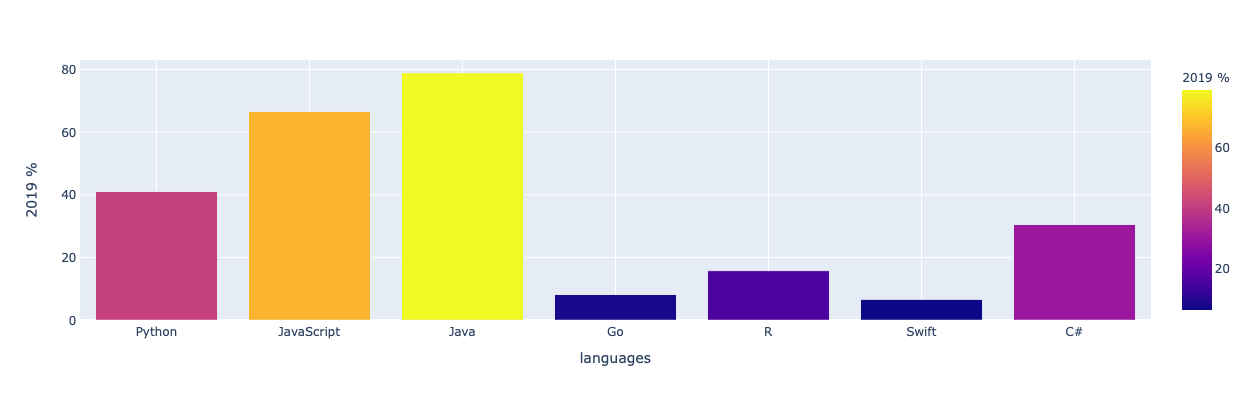

In [115]:
fig = px.bar(t_language_df,  x=t_language_df.index, y='2019',labels={'2019':'2019 %', 'index':'languages'}, height=400,color='2019',)
fig.show()

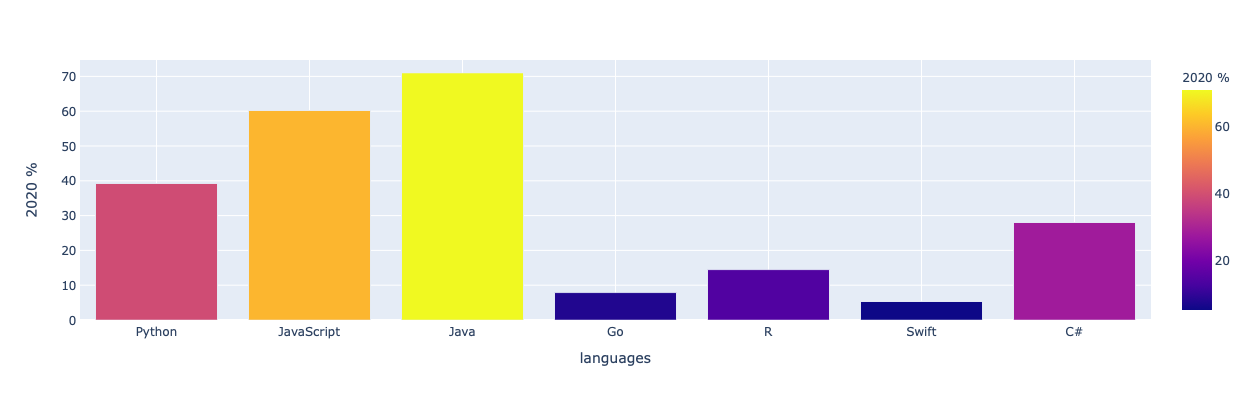

In [116]:

fig = px.bar(t_language_df,  x=t_language_df.index, y='2020',labels={'2020':'2020 %', 'index':'languages'}, height=400,color='2020',)
fig.show()

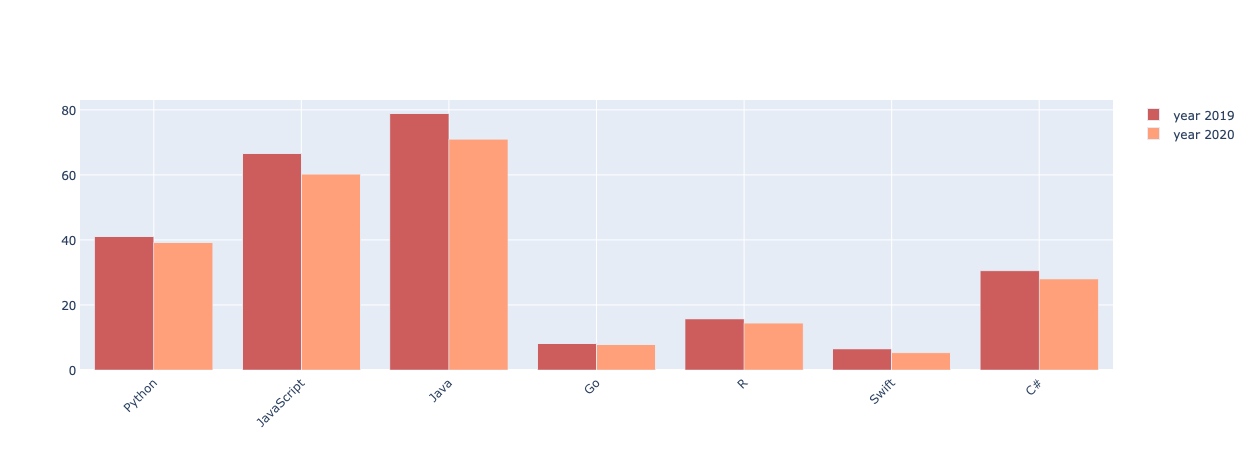

In [117]:
import plotly.graph_objects as go

x = t_language_df.index

fig = go.Figure()
fig.add_trace(go.Bar(
    x=x,
    y=t_language_df['2019'],
    name='year 2019',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=x,
    y=t_language_df['2020'],
    name='year 2020',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()